#  <span style='color:indianred'>  Predicting Movie Revenue with Linear Models </span>

In [9]:
install.packages("stargazer")
install.packages("margins")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [15]:
library(stargazer)
library(margins)

##  <span style='color:indianred'>  1. Load Data </span>

In [2]:
movie_df <- read.csv("./moviedata.csv", sep = ";")

##  <span style='color:indianred'>  2. Inspect the data </span>

In [4]:
head(movie_df,5)

Movie,Month,Day,Release.Year,Budget..M.,Domestic.Gross..M.,Worldwide.Gross..M.,Votes,Rating
X-Men: Days of Future Past,May,23,2014,200,233.9215,747.8628,16232,8.9
The Amazing Spider-Man 2,May,2,2014,200,202.8539,708.9963,99636,7.4
Captain America: The Winter Soldier,Apr,4,2014,170,259.7470,714.4019,141817,8.2
Godzilla,May,16,2014,160,200.6761,529.0761,125409,5.3
How to Train Your Dragon 2,Jun,13,2014,145,177.0029,616.1029,750,8.7


In [5]:
skimr::skim(movie_df)

── Data Summary ────────────────────────
                           Values  
Name                       movie_df
Number of rows             300     
Number of columns          9       
_______________________            
Column type frequency:             
  factor                   2       
  numeric                  7       
________________________           
Group variables            None    

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 Movie                 0             1 FALSE        300
2 Month                 0             1 FALSE         12
  top_counts                        
1 12 : 1, 2 G: 1, 3 D: 1, 30 : 1    
2 Mar: 35, Jan: 29, Apr: 28, Jul: 28

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable       n_missing complete_rate     mean        sd      p0     p25
1 Day                         0             1    15.6      8.84     1   

##  <span style='color:indianred'>  3. Create new variables </span>

In [6]:
movie_df["Gross.Revenue..M."] <- movie_df["Worldwide.Gross..M."] + movie_df["Domestic.Gross..M."]
movie_df["Month"] <- match(movie_df$Month, month.abb)
movie_df <- movie_df[-which(movie_df$Gross.Revenue..M. == 0),]
movie_df["Summer"] <- ifelse(movie_df$Month > 4  & movie_df$Month < 9, 1, 0)
movie_df["Xmas"] <- ifelse(movie_df$Month < 10, 1, 0)

##  <span style='color:indianred'>  4. Fit and Summarize Linear Models </span>

**<span style='color:midnightblue'> We create 3 models: 'dom', 'wor' and 'gro', each predicting a different dependent variables with the same independent variables.** 

In [18]:
model_dom <- MASS::stepAIC(lm(Domestic.Gross..M. ~ Month + Day + Release.Year + Budget..M. + Rating + 
                                Votes + Summer + Xmas, data = movie_df), trace = 0, direction = "both")

model_wor <- MASS::stepAIC(lm(Worldwide.Gross..M. ~ Month + Day + Release.Year + Budget..M. + Rating +
                                Votes + Summer + Xmas, data = movie_df), trace = 0, direction = "both")

model_gro <- MASS::stepAIC(lm(Gross.Revenue..M. ~ Month + Day + Release.Year + Budget..M. + Rating + 
                                Votes + Summer + Xmas, data = movie_df), trace = 0, direction = "both")

stargazer::stargazer(model_dom, model_wor, model_gro, type = "html", report = "vc*", star.cutoffs = c(.05, .01, .001), out = "table1.html")


<table style="text-align:center"><tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td>Domestic.Gross..M.</td><td>Worldwide.Gross..M.</td><td>Gross.Revenue..M.</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Day</td><td>-0.546</td><td></td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Release.Year</td><td>10.992</td><td></td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Budget..M.</td><td>0.739<sup>***</sup></td><td>2.475<sup>***</sup></td><td>3.214<sup>***</sup></td></tr>
<tr><td st

**<span style='color:midnightblue'> The code above creates an html file in the root folder. The results of the regression are the following:** 
    <span>
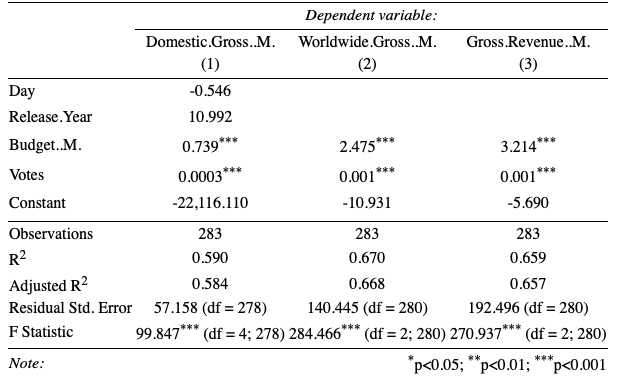

##  <span style='color:indianred'>  5. Predict Worldwide Revenue Given Movie Budget </span>

       xvals     yvals     upper      lower
1    0.06000  32.49834  56.61400   8.382678
2   11.51583  60.85699  82.46409  39.249888
3   22.97167  89.21564 108.66158  69.769693
4   34.42750 117.57429 135.33377  99.814810
5   45.88333 145.93294 162.62514 129.240735
6   57.33917 174.29159 190.65730 157.925877
7   68.79500 202.65024 219.47343 185.827050
8   80.25083 231.00889 249.01387 213.003914
9   91.70667 259.36754 279.14922 239.585859
10 103.16250 287.72619 309.73590 265.716490
11 114.61833 316.08484 340.65139 291.518294
12 126.07417 344.44349 371.80368 317.083304
13 137.53000 372.80214 403.12740 342.476893
14 148.98583 401.16080 434.57693 367.744660
15 160.44167 429.51945 466.12042 392.918468
16 171.89750 457.87810 497.73536 418.020834
17 183.35333 486.23675 529.40557 443.067923
18 194.80917 514.59540 561.11926 468.071535
19 206.26500 542.95405 592.86766 493.040439
20 217.72083 571.31270 624.64415 517.981251


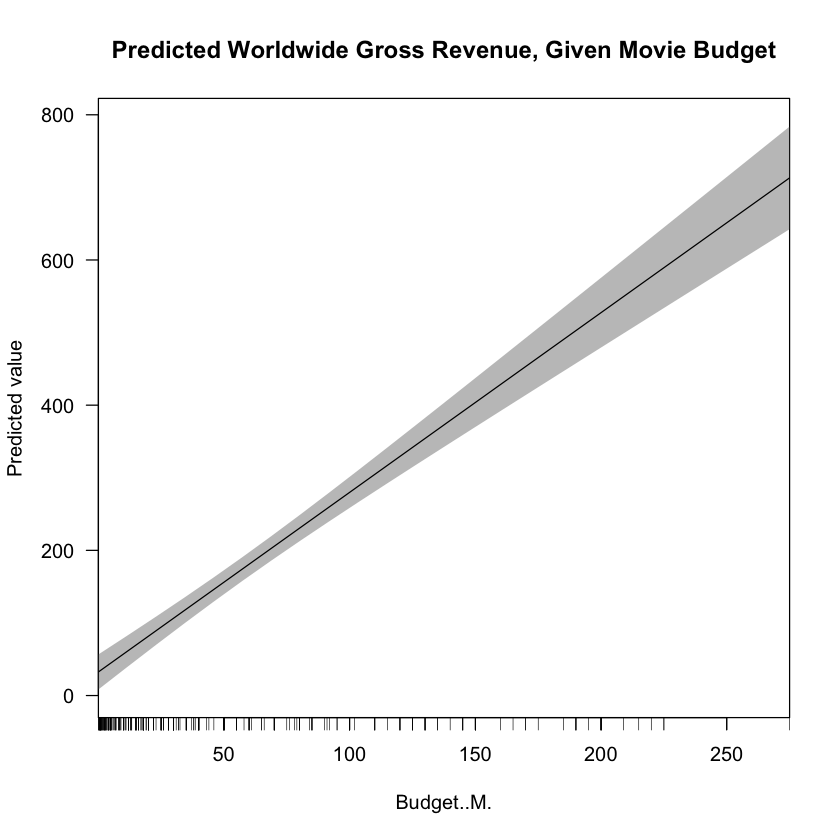

In [16]:
margins::cplot(model_wor, "Budget..M.", what = "prediction", 
               main = "Predicted Worldwide Gross Revenue, Given Movie Budget")

##  <span style='color:indianred'>  6. Predict Worldwide Revenue Given Movie Votes  </span>

       xvals    yvals    upper    lower
1     503.00 128.9225 150.3295 107.5154
2   33045.62 148.8569 166.8153 130.8986
3   65588.25 168.7914 185.1846 152.3982
4   98130.88 188.7259 205.9587 171.4931
5  130673.50 208.6603 228.8394 188.4813
6  163216.12 228.5948 253.0778 204.1118
7  195758.75 248.5293 278.0866 218.9720
8  228301.38 268.4637 303.5329 233.3946
9  260844.00 288.3982 329.2400 247.5564
10 293386.62 308.3327 355.1115 261.5538
11 325929.25 328.2671 381.0919 275.4423
12 358471.88 348.2016 407.1478 289.2554
13 391014.50 368.1361 433.2578 303.0143
14 423557.12 388.0705 459.4080 316.7331
15 456099.75 408.0050 485.5886 330.4214
16 488642.38 427.9395 511.7929 344.0861
17 521185.00 447.8739 538.0158 357.7320
18 553727.62 467.8084 564.2539 371.3629
19 586270.25 487.7429 590.5042 384.9815
20 618812.88 507.6773 616.7647 398.5900


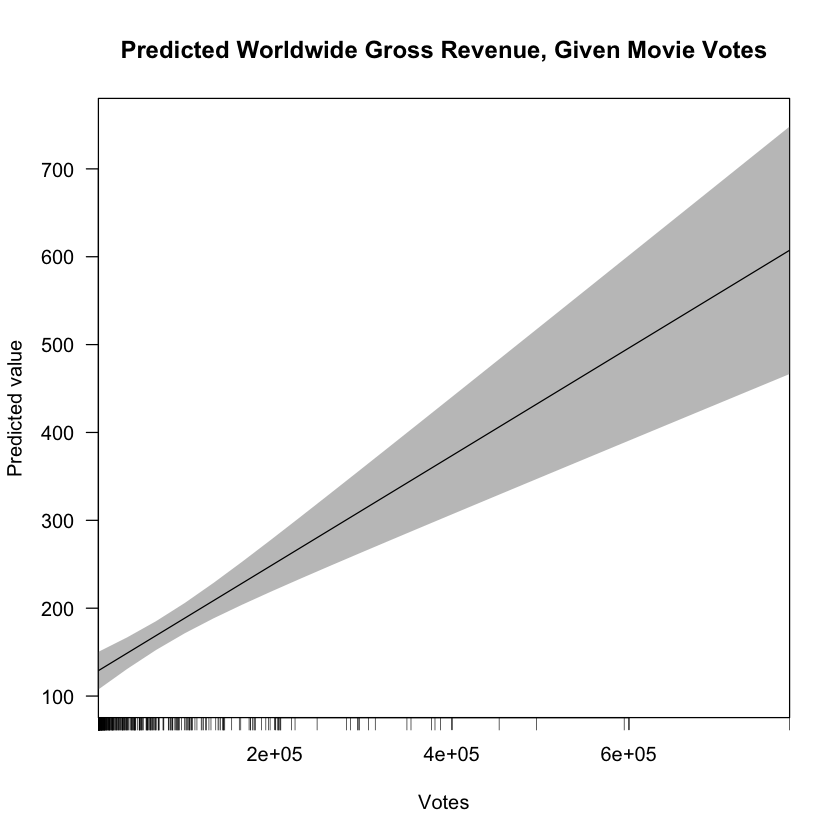

In [17]:
margins::cplot(model_wor, "Votes", what = "prediction", 
               main = "Predicted Worldwide Gross Revenue, Given Movie Votes")